# Import libraries

In [ ]:
# Pandas
import pandas as pd
# Numpy
import numpy as np
# Libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# Train-test split
from sklearn.model_selection import train_test_split
# Min-max scling
from sklearn.preprocessing import MinMaxScaler
#R-squared
from sklearn.metrics import r2_score
# Importing LinearRegression
from sklearn.linear_model import LinearRegression
# Importing MSE
from sklearn.metrics import mean_squared_error

# Import Data

In [ ]:
# Assuming "CarsData.csv" file is uploaded to your Colab environment
try:
  df = pd.read_csv('/CarsData.csv')
  print("File loaded successfully.")
except FileNotFoundError:
  print("Error: CarsData.csv not found. Please upload the file to your Colab environment.")
except pd.errors.ParserError:
  print("Error: Could not parse the CSV file. Please check the file format.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")


File loaded successfully.


# Understanding Data

In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.shape

(205, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Data Proccessing

Change (CarName) into (Company) that contains only the company name

In [ ]:
# Creating 'Company' column
company = df["CarName"].str.split(" ", n = 1, expand = True)
df["company"] = company[0]

# Dropping 'CarName' column
df.drop("CarName",axis=1,inplace=True)

Drop car_ID as we are not using it

In [ ]:
df.drop("car_ID",axis=1,inplace=True)

Handling null values

In [ ]:
# Check for null values in each column
df.isnull().sum()

,0
symboling,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0
carlength,0
carwidth,0


Handlin misspilling

In [ ]:
df['drivewheel'] = df['drivewheel'].replace('4wd','fwd')
df['company'] = df['company'].replace('maxda','mazda')
df['company'] = df['company'].replace('porcshce','porsche')
df['company'] = df['company'].replace('toyouta','toyota')
df['company'] = df['company'].replace('vokswagen','volkswagen')
df['company'] = df['company'].replace('Nissan','nissan')
df['company'] = df['company'].replace('vw','volkswagen')

Handling outliers

In [ ]:
col_numeric = ['wheelbase','carlength','carwidth','carheight','curbweight', 'enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

for col in col_numeric:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    df = df[(df[col] > range_low) & (df[col] < range_high)]

df.shape

(123, 25)

# Check Balance

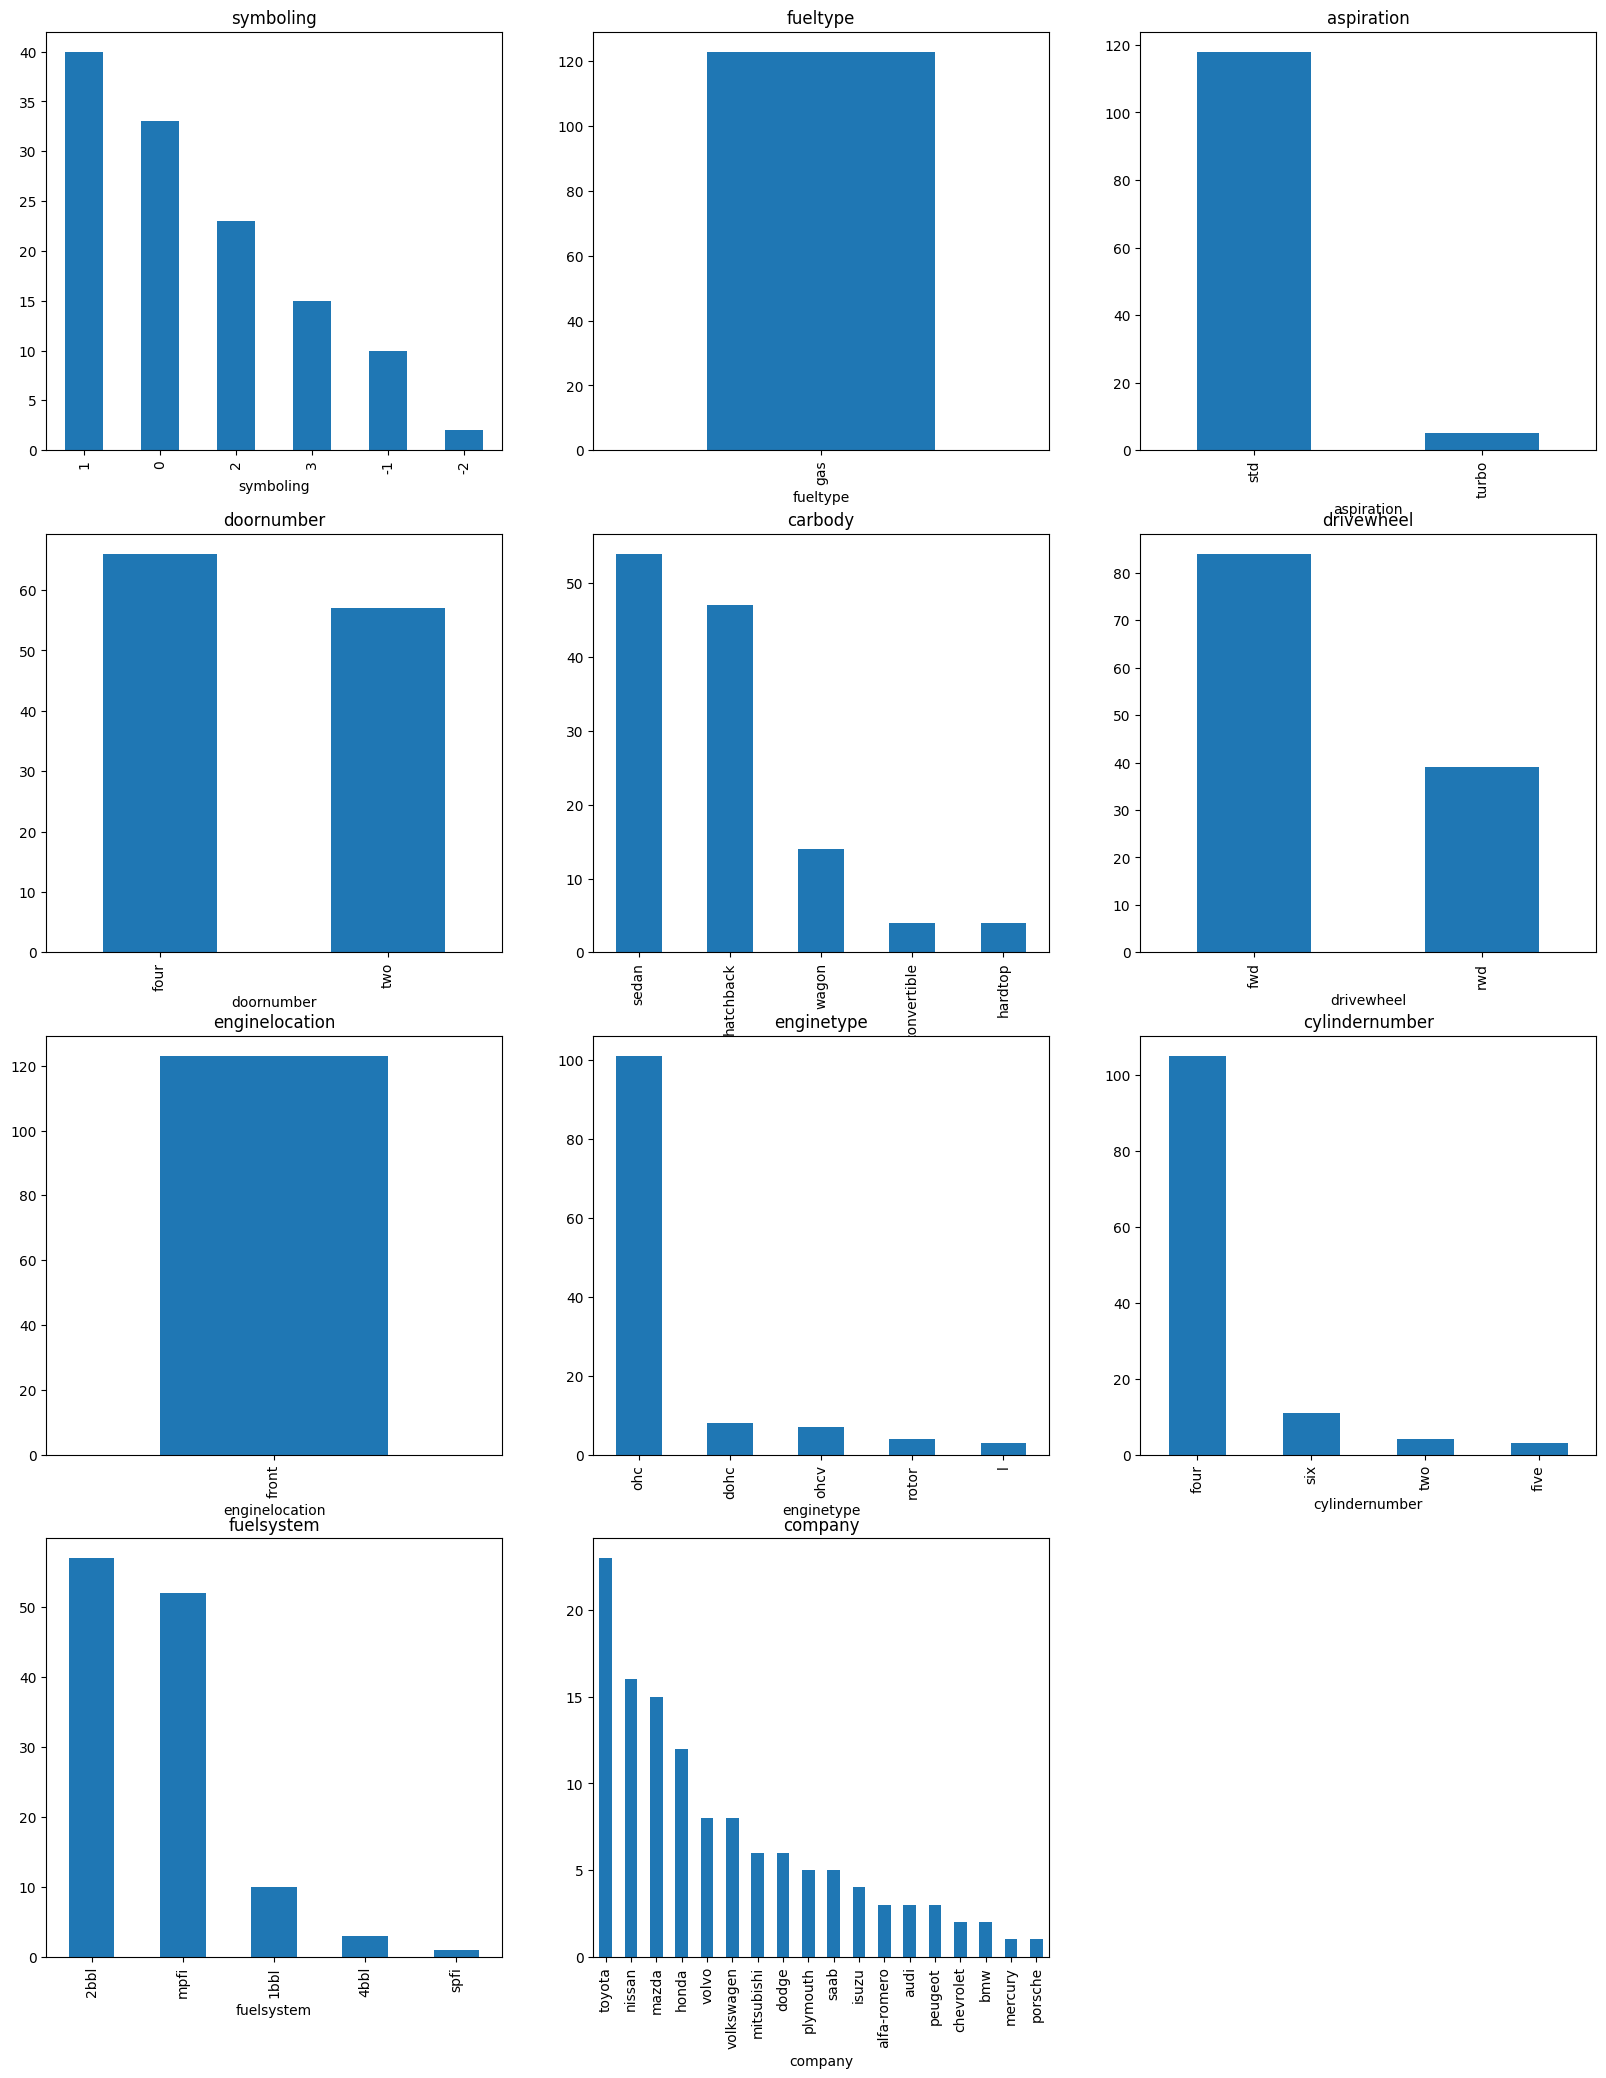

In [ ]:
col_category = ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'company']
k=0
plt.figure(figsize=(20, 25))
for col in col_category:
    k=k+1
    plt.subplot(4, 3,k)
    df[col].value_counts().plot(kind='bar')
    plt.title(col)

**Observations:**
1. symboling: There are very few with rating -2.
2. fuletype: All the cars fule type is Gas, as Diesel cars were removed while removing outliers.
3. aspiration: Lesser number of turbo than std.
4. engineloaction: All the engine location is in front, as all the rear engine cars were removed while removing outliers.
5. enginetype: Considerably more number of ohc than others.
6. cylindernumber: Large number of four cyliners than others.
7. fulesystem: mpfi and 2bbl fulesystem cars are more comparitavely others.
8. company: Most of the Toyata company cars were surveyed.

# Vesualizations

## Visualising the numerical variables

<Figure size 1200x1200 with 0 Axes>

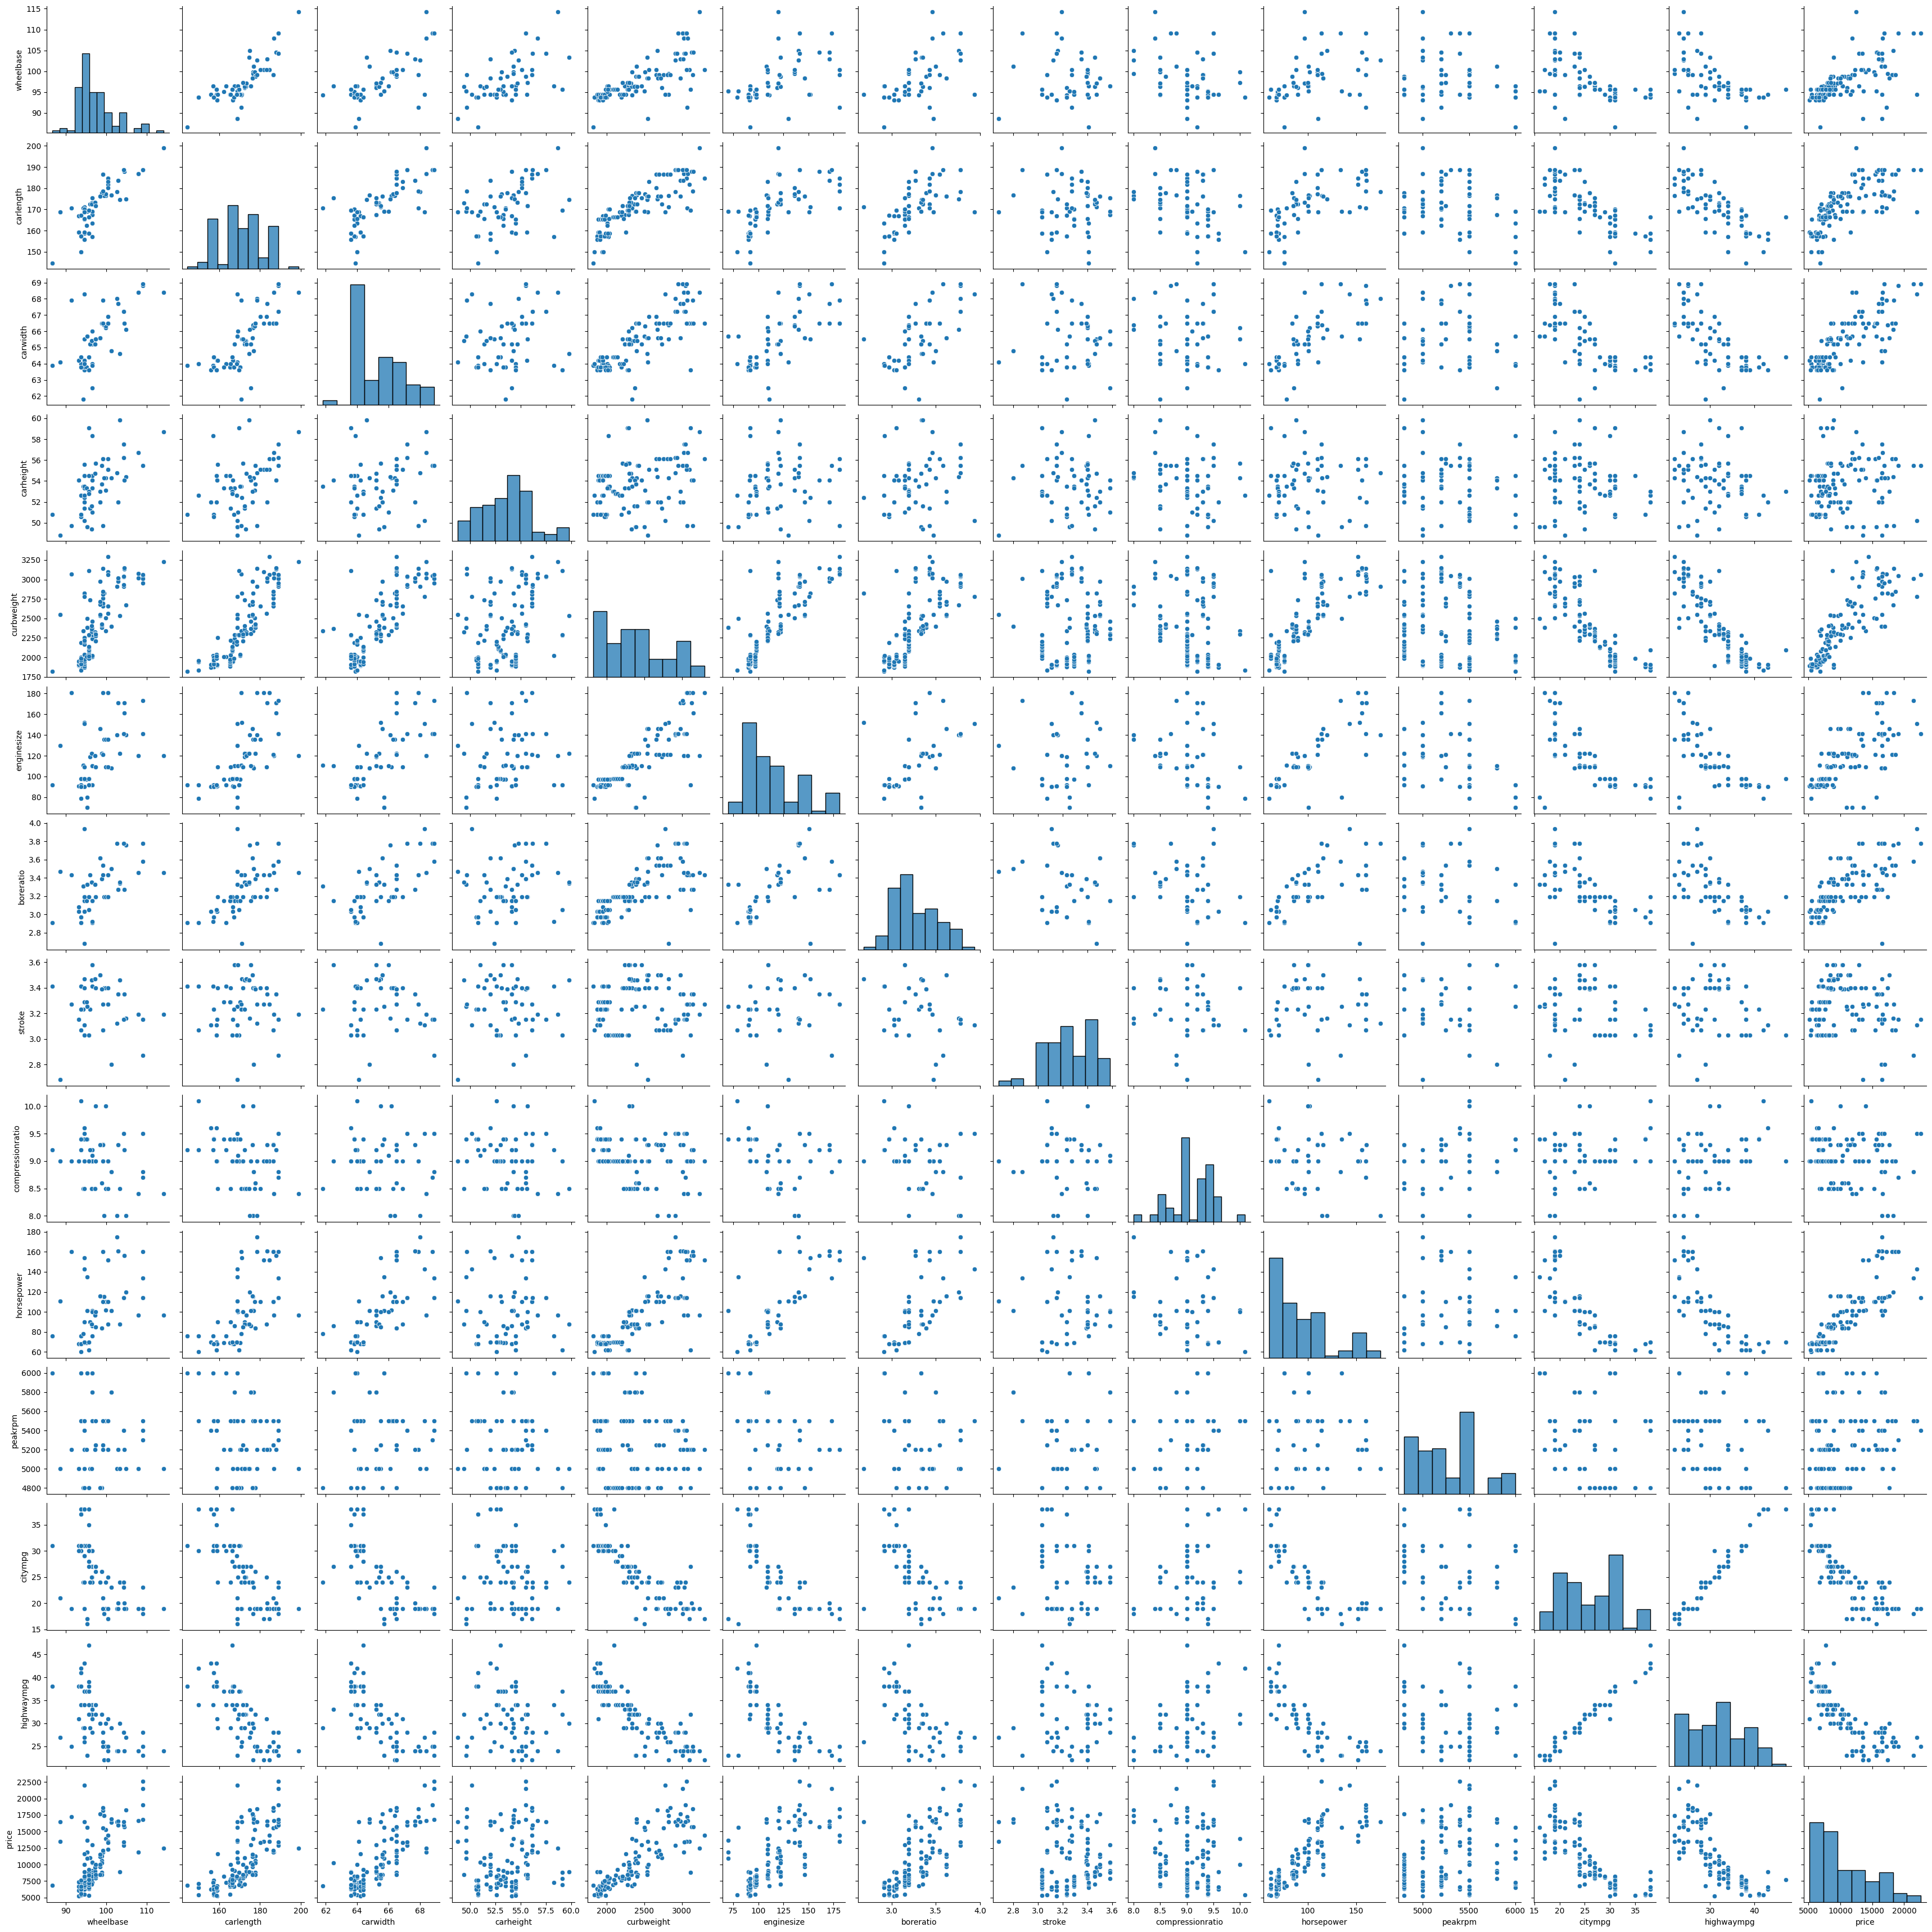

In [ ]:
plt.figure(figsize=(12,12))
sns.pairplot(df[col_numeric])
plt.show()

## Visualising the categorical variables

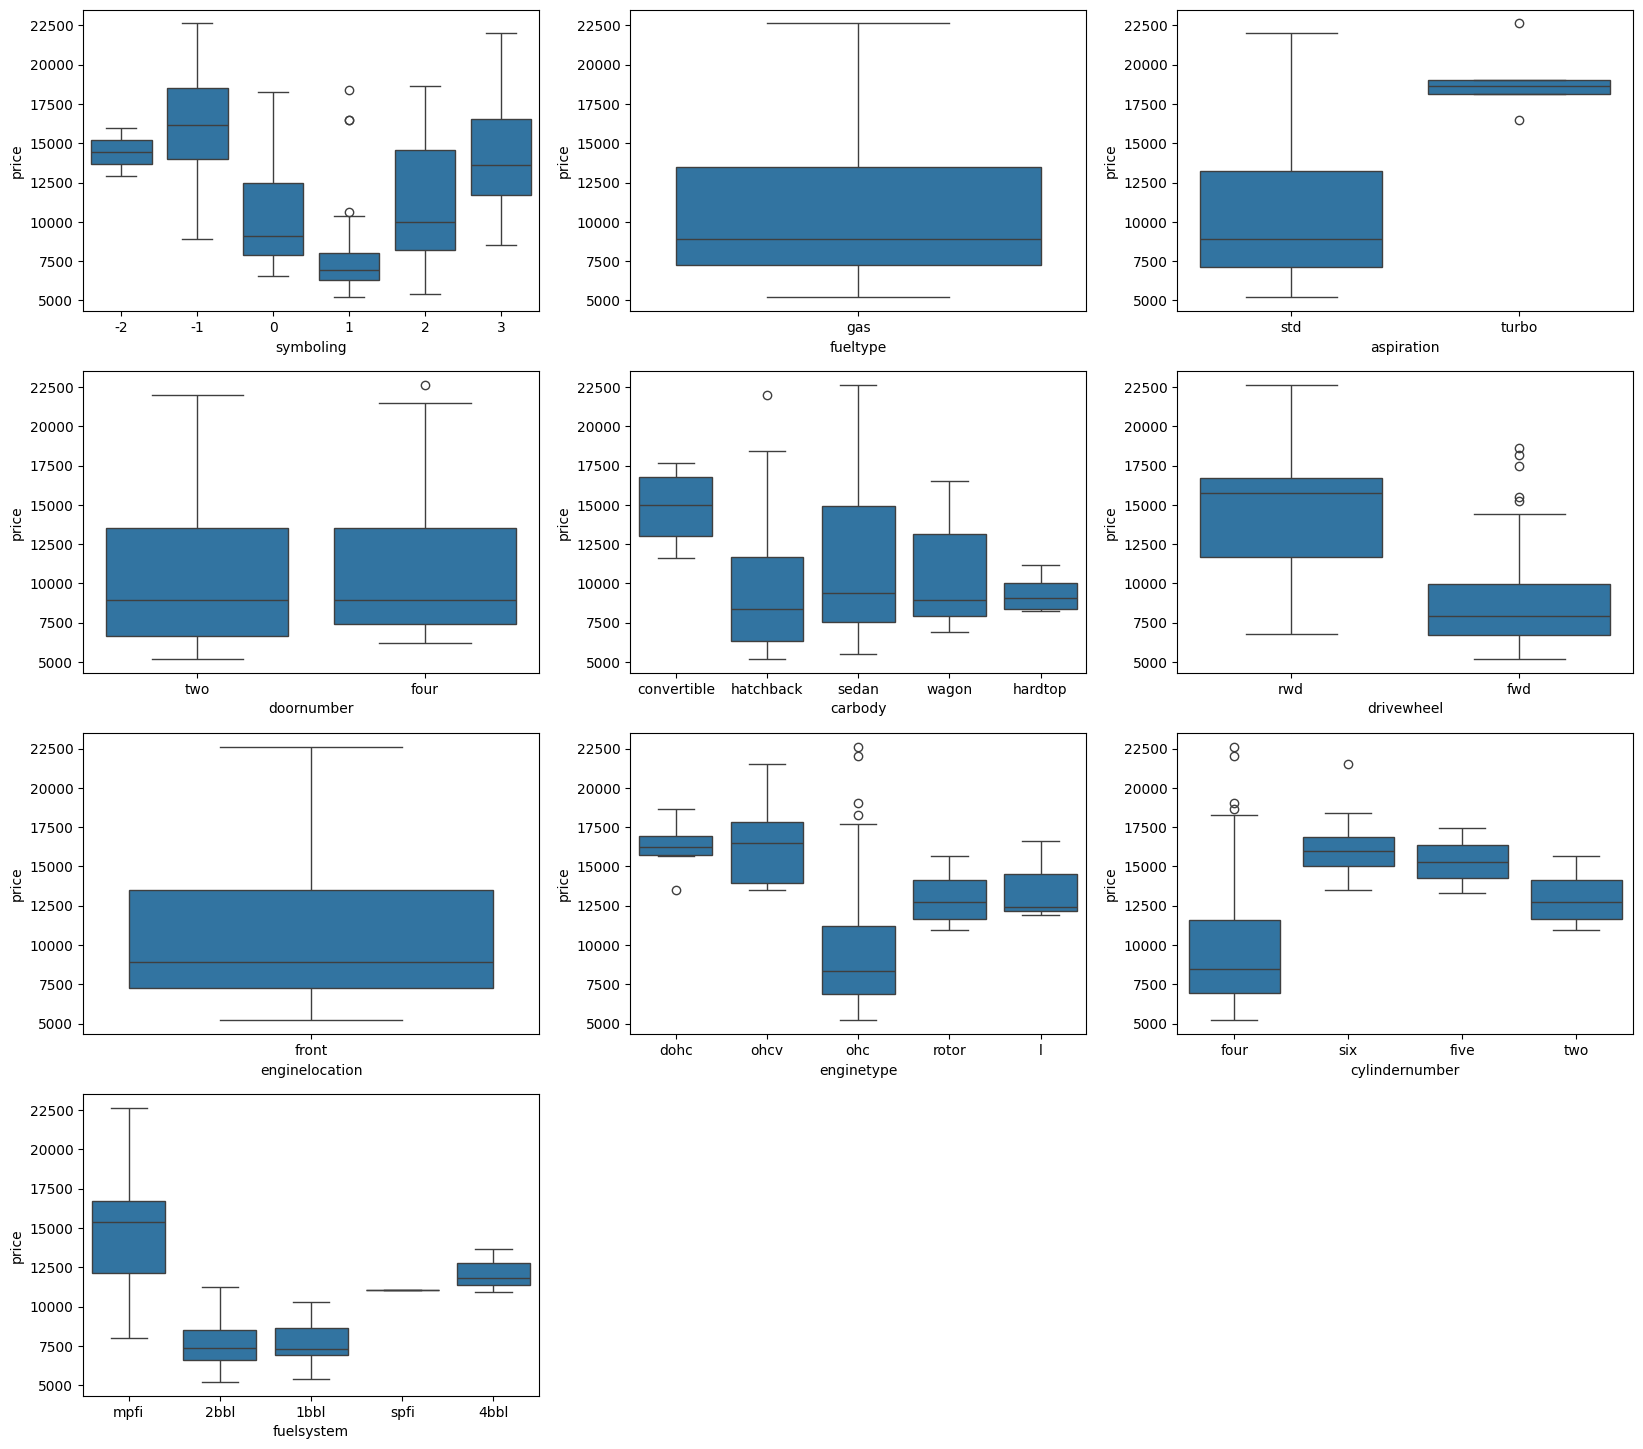

In [ ]:
k=0
plt.figure(figsize=(20,18))
for col in range (len(col_category)-1):
    k=k+1
    plt.subplot(4, 3, k)
    sns.boxplot(x = col_category[col], y = 'price', data = df)

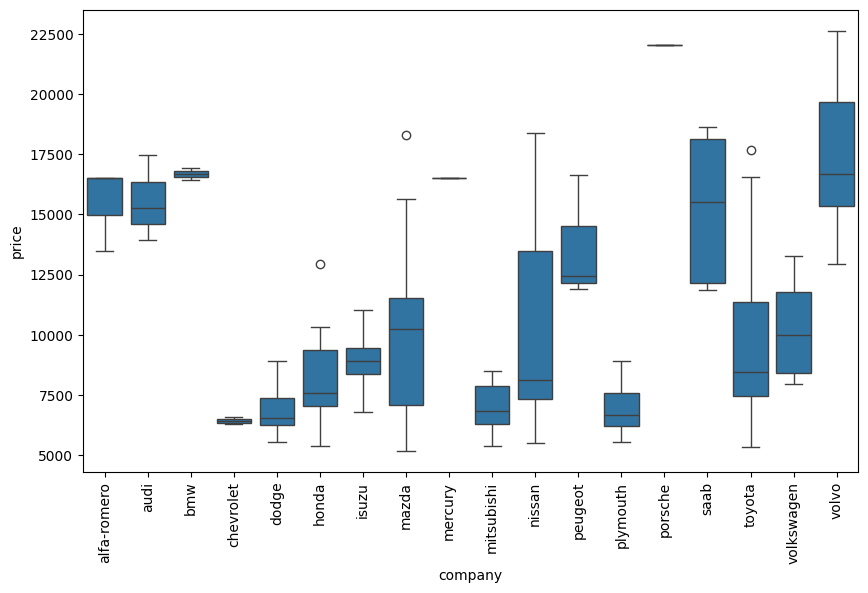

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='company', y='price', data=df)
plt.xticks(rotation=90)
plt.show()


**Observations**

1. company: Porsche has very high median price compared to other cars, though the number of Porsche cars is very less. Volvo, alfa-romero, audi and BMW are also high median price than others. Saab has wide rage of price, with high median price.
2. aspiration: std has lower median than turbo.
3. carbody: convertible has higher median that others.
4. symboling: -2 and -1 have higher median price than others.
5. enginelocation: rear has very high median price than fromt.
6. cylindernumber: Four has lower median than others.
7. fulesystem: 1bbl and 2bbl have lower median price than others.

# Preparing Data

Converting categorical variables (fueltype, aspiration, doornumber, drivewheel, enginelocation) with two levels to binary variables.

In [ ]:
df['fueltype'] = df['fueltype'].map({'gas': 1, 'diesel': 0})
df['aspiration'] = df['aspiration'].map({'std':1, 'turbo':0})
df['doornumber'] = df['doornumber'].map({'four':1, 'two':0})
df['drivewheel'] = df['drivewheel'].map({'fwd':1, 'rwd':0})
df['enginelocation'] = df['enginelocation'].map({'front':1, 'rear':0})

Converting other categorical variables with more than two levels to dummy variables

In [ ]:
# symboling
# Value -2 is dummy
symboling_dummies = pd.get_dummies(df['symboling'], drop_first = True)
symboling_dummies = symboling_dummies.rename(columns={-1:'symboling(-1)', 0:'symboling(0)', 1:'symboling(1)',2:'symboling(2)', 3:'symboling(3)'})
df = pd.concat([df,symboling_dummies], axis=1)
df.drop('symboling', axis=1, inplace=True)

In [ ]:
# carbody
# Value convertible is dummy
carbody_dummies = pd.get_dummies(df['carbody'], drop_first = True)
carbody_dummies = carbody_dummies.rename(columns={'hardtop':'carbody(hardtop)', 'hatchback':'carbody(hatchback)', 'sedan':'carbody(sedan)','wagon':'carbody(wagon)'})
df = pd.concat([df,carbody_dummies], axis=1)
df.drop('carbody', axis=1, inplace=True)

In [ ]:
# enginetype
# Value dohc is dummy
enginetype_dummies = pd.get_dummies(df['enginetype'], drop_first = True)
enginetype_dummies = enginetype_dummies.rename(columns={'dohcv':'enginetype(dohcv)', 'l':'enginetype(l)', 'ohc':'enginetype(ohc)', 'ohcf':'enginetype(ohcf)', 'ohcv':'enginetype(ohcv)', 'rotor':'enginetype(rotor)'})
df = pd.concat([df,enginetype_dummies], axis=1)
df.drop('enginetype', axis=1, inplace=True)

In [ ]:
# cylindernumber
# value eight is dummy
cylindernumber_dummies = pd.get_dummies(df['cylindernumber'], drop_first = True)
cylindernumber_dummies = cylindernumber_dummies.rename(columns={'five':'cylindernumber(five)', 'four':'cylindernumber(four)', 'six':'cylindernumber(six)', 'three':'cylindernumber(three)', 'twelve':'cylindernumber(twelve)', 'two':'cylindernumber(two)'})
df = pd.concat([df,cylindernumber_dummies], axis=1)
df.drop('cylindernumber', axis=1, inplace=True)

In [ ]:
# fuelsystem
# Value 1bbl is dummy
fuelsystem_dummies = pd.get_dummies(df['fuelsystem'], drop_first = True)
fuelsystem_dummies = fuelsystem_dummies.rename(columns={'2bbl':'fuelsystem(2bbl)', '4bbl':'fuelsystem(4bbl)', 'idi':'fuelsystem(idi)', 'mfi':'fuelsystem(mfi)', 'mpfi':'fuelsystem(mpfi)', 'spdi':'fuelsystem(spdi)', 'spfi':'fuelsystem(spfi)'})
df = pd.concat([df,fuelsystem_dummies], axis=1)
df.drop('fuelsystem', axis=1, inplace=True)

In [ ]:
# company
# Value alfa-romero is dummy
company_dummies = pd.get_dummies(df['company'], drop_first = True)
company_dummies = company_dummies.rename(columns={'audi':'CarCompany(audi)', 'bmw':'CarCompany(bmw)', 'buick':'CarCompany(buick)', 'chevrolet':'CarCompany(chevrolet)','dodge':'CarCompany(dodge)' ,'honda':'CarCompany(honda)', 'isuzu':'CarCompany(isuzu)','jaguar':'CarCompany(jaguar)', 'mazda':'CarCompany(mazda)', 'mercury':'CarCompany(mercury)','mitsubishi':'CarCompany(mitsubishi)','nissan':'CarCompany(nissan)', 'peugeot':'CarCompany(peugeot)','plymouth':'CarCompany(plymouth)','porsche':'CarCompany(porsche)', 'renault':'CarCompany(renault)','saab':'CarCompany(saab)','subaru':'CarCompany(subaru)', 'toyota':'CarCompany(toyota)','volkswagen':'CarCompany(volkswagen)','volvo':'CarCompany(volvo)'})
df = pd.concat([df,company_dummies], axis=1)
df.drop('company', axis=1, inplace=True)

In [ ]:
# prompt: scale data (normlize it)

# Assuming 'df' is your DataFrame from the previous code

# Select numerical features for scaling
numerical_features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                      'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                      'peakrpm', 'citympg', 'highwaympg', 'price']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the selected numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Now the numerical features in the 'df' DataFrame are scaled between 0 and 1


**Now we can apply liner regression**

# Scaling Data

In [ ]:
scaler = MinMaxScaler()
df[col_numeric] = scaler.fit_transform(df[col_numeric])

In [ ]:
df.head()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,CarCompany(mercury),CarCompany(mitsubishi),CarCompany(nissan),CarCompany(peugeot),CarCompany(plymouth),CarCompany(porsche),CarCompany(saab),CarCompany(toyota),CarCompany(volkswagen),CarCompany(volvo)
0,1,1,0,0,1,0.072464,0.445672,0.323944,0.000000,0.493568,...,False,False,False,False,False,False,False,False,False,False
1,1,1,0,0,1,0.072464,0.445672,0.323944,0.000000,0.493568,...,False,False,False,False,False,False,False,False,False,False
2,1,1,0,0,1,0.286232,0.489871,0.521127,0.327273,0.679756,...,False,False,False,False,False,False,False,False,False,False
3,1,1,1,1,1,0.478261,0.589319,0.619718,0.500000,0.350711,...,False,False,False,False,False,False,False,False,False,False
4,1,1,1,1,1,0.463768,0.589319,0.647887,0.500000,0.680433,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.describe()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,86.0,86.00000,86.000000,86.000000,86.0,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,1.0,0.94186,0.511628,0.709302,1.0,0.378202,0.468393,0.285871,0.415856,0.369464,0.387492,0.456349,0.622545,0.521705,0.293124,0.392926,0.476744,0.417209,0.292751
std,0.0,0.23538,0.502797,0.456748,0.0,0.162068,0.198184,0.269247,0.226509,0.273911,0.234993,0.203495,0.218194,0.186002,0.262867,0.299614,0.265295,0.236646,0.251332
min,1.0,0.00000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,1.00000,0.000000,0.000000,1.0,0.286232,0.354972,0.042453,0.240909,0.125931,0.198198,0.293651,0.477778,0.476190,0.078261,0.166667,0.318182,0.240000,0.094860
50%,1.0,1.00000,1.000000,1.000000,1.0,0.329710,0.449355,0.188679,0.395455,0.323968,0.346847,0.404762,0.625000,0.500000,0.221739,0.333333,0.500000,0.420000,0.198567
75%,1.0,1.00000,1.000000,1.000000,1.0,0.442029,0.587477,0.438679,0.543182,0.549425,0.468468,0.595238,0.800000,0.666667,0.443478,0.583333,0.681818,0.600000,0.469134
max,1.0,1.00000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Splitting Data

In [ ]:
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
print("Training Festures Shape: ", X_train.shape)
print("Training Target Shape: ", y_train.shape)
print("Testing Festures Shape: ", X_test.shape)
print("Testing Target Shape: ", y_test.shape)

Training Festures Shape:  (86, 55)
Training Target Shape:  (86,)
Testing Festures Shape:  (37, 55)
Testing Target Shape:  (37,)


# Train The Model

In [ ]:
Model = LinearRegression()
Model.fit(X_train, y_train)

LinearRegression()

Make pedictions on test set

In [ ]:
y_pred = Model.predict(X_test)

# Evaluate The Model

In [ ]:
# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 0.025735209805161786
R-squared: 0.445350466716381
